# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(
    low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="



In [4]:
lat = []
temp = []
humidity = []
wind_speed = []
cloudiness = []
city_2 = []



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
for city in cities:
    print(city)
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        city_2.append(response["name"])
    except KeyError:
        print("City not found")
        
print("Completed")

yellowknife
cidreira
palana
jamestown
bocaranga
City not found
hamilton
oksfjord
taolanaro
City not found
albany
namibe
kapaa
busselton
talnakh
clyde river
ushuaia
phetchabun
la rioja
hermanus
barrow
sentyabrskiy
City not found
sibolga
cuenca
tiksi
swan river
havre-saint-pierre
atuona
saint-pierre
mataura
khatanga
amderma
City not found
viedma
tsihombe
City not found
pisco
mar del plata
kodiak
mahebourg
sehithwa
rikitea
samarai
bata
kruisfontein
cape town
mahmudabad
hasaki
tromso
lompoc
punta arenas
dikson
inuvik
bluff
port alfred
bredasdorp
verkhnevilyuysk
urulga
City not found
calbuco
ngunguru
siddipet
tuatapere
elko
saldanha
udachnyy
harnai
avarua
thompson
along
fairbanks
half moon bay
zaragoza
burley
puerto ayora
sovetskiy
east london
wajid
new norfolk
batemans bay
portland
lebu
aklavik
ribeira grande
midland
pacific grove
karkaralinsk
City not found
valparaiso
igrim
nampula
lagos
georgetown
paoua
burica
City not found
yulara
charlestown
provideniya
obluche
City not found
dingle
il

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_info = {
    "City" : city_2,
    "Lattitude" : lat,
    "Temperature" : temp,
    "Humidity" : humidity,
    "Wind Speed" : wind_speed,
    "Cloudiness" : cloudiness
}
city_data = pd.DataFrame(weather_info)
city_data.head()

,City,Lattitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Yellowknife,62.45,-20.00,76,5.10,90
1,Cidreira,-30.17,23.60,93,6.43,88
2,Palana,59.08,-15.46,61,1.23,0
3,Jamestown,-33.21,26.62,28,5.76,0
4,Hamilton,43.26,-5.00,73,6.70,90


In [16]:
city_data.to_csv(output_data_file)
city_data.to_csv("city_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

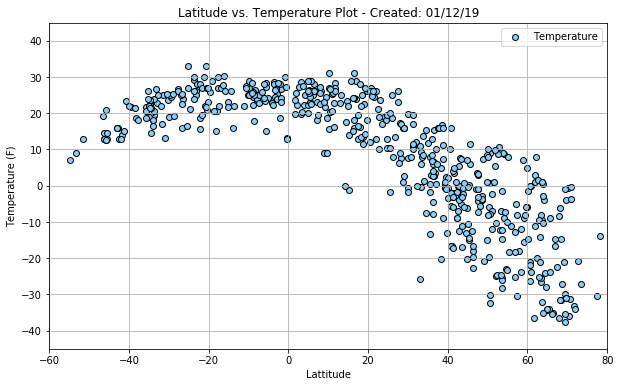

In [11]:
x = city_data["Lattitude"]
y = city_data["Temperature"]
plt.figure(figsize=(10,6))
plt.title("Latitude vs. Temperature Plot - Created: 01/12/19")
plt.scatter(x,y,c="lightskyblue", edgecolors="black")
plt.grid()
plt.legend()
plt.ylabel("Temperature (F)")
plt.xlabel("Lattitude")
plt.xlim(-60,80)
plt.ylim(-45,45)

plt.savefig("Lattitude vs Tempterature.png")

plt.show()

#### Latitude vs. Humidity Plot

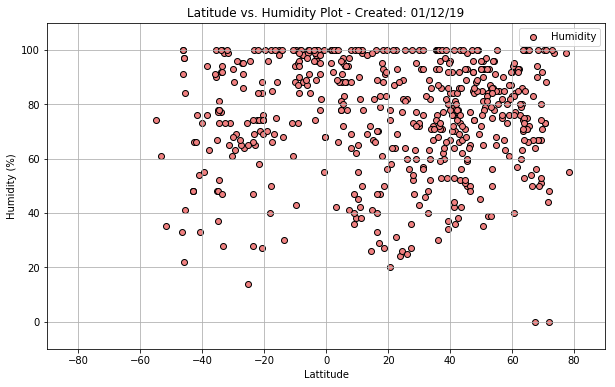

In [12]:
x = city_data["Lattitude"]
y = city_data["Humidity"]
plt.figure(figsize=(10,6))
plt.title("Latitude vs. Humidity Plot - Created: 01/12/19")
plt.scatter(x,y,c="lightcoral", edgecolors="black")
plt.grid()
plt.legend()
plt.ylabel("Humidity (%)")
plt.xlabel("Lattitude")
plt.xlim(-90,90)
plt.ylim(-10,110)

plt.savefig("Lattitude vs Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

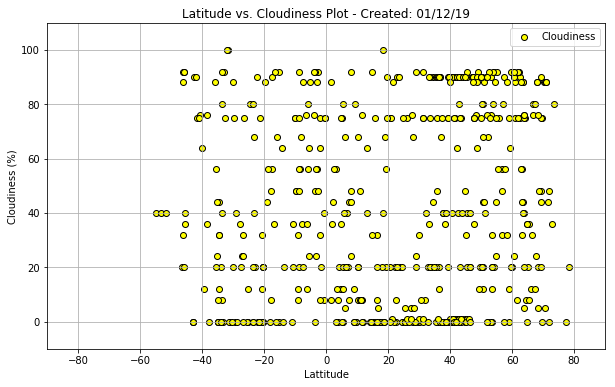

In [13]:
x = city_data["Lattitude"]
y = city_data["Cloudiness"]
plt.figure(figsize=(10,6))
plt.title("Latitude vs. Cloudiness Plot - Created: 01/12/19")
plt.scatter(x,y,c="yellow", edgecolors="black")
plt.grid()
plt.legend()
plt.ylabel("Cloudiness (%)")
plt.xlabel("Lattitude")
plt.xlim(-90,90)
plt.ylim(-10,110)

plt.savefig("Lattitude vs Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

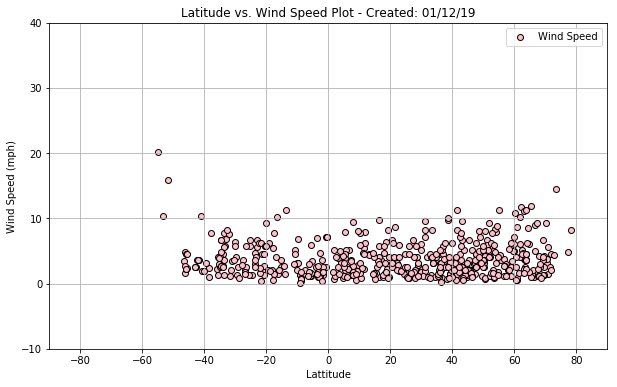

In [14]:
x = city_data["Lattitude"]
y = city_data["Wind Speed"]
plt.figure(figsize=(10,6))
plt.title("Latitude vs. Wind Speed Plot - Created: 01/12/19")
plt.scatter(x,y,c="pink", edgecolors="black")
plt.grid()
plt.legend()
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Lattitude")
plt.ylim(-10,40)
plt.xlim(-90,90)

plt.savefig("Lattitude vs Wind Speed.png")

plt.show()

### Observations:
* Based on the Temp vs lat chart, we can conclude:
    - There is temperate weather towards the equator
    - As we move towards the northern hemisphere the temperature drops as it is winter in Northern hemisphere.
    - On the contrarary, we see increase in temperature toward the Southern hemisphere as it would be summer.
    - As you go towards South Pole, you notice the decreasing temperature.
* Considering the charts of Cloudiness & Humidity Vs latitude:
    - We see there does not exists a definite relationship with these parameters.
    - Although sporadiac patterns reveal that Humidity tends to be higher in northern hemispheres.
* Finally considering the windspeed:
   - The wind speed is between 0-10mph throughout dispersing at the same rate in both hemisphere.
   - It seems the random data has not selected data of cities towards the poles,since those areas are very scarsely populated.
   - Based on some of the cities taken in consideration it can be seen the windgust is increasing steeply approaching towards 
     the poles.